## CTCF HT-SELEX (Jolma et al. 2013) | Model training

In [21]:
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
cd ~/workspace/theislab/mubind/docs/notebooks/batch

/home/ilibarra/workspace/theislab/mubind/docs/notebooks/batch


In [23]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations' # '../../annotations'
# mb.models.Mubind
import torch.optim as topti
import torch.utils.data as tdata
import numpy as np

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [24]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)

# data = df.head(1000)
# data = df.copy()

df.index = df['seq']
del df['seq']
df.index = df.index.astype(str).str[45:]

df = df[~df.index.duplicated(keep='first')]

n_sample = 10000
if n_sample is not None:
    data = df.sample(min(df.shape[0], n_sample))
else:
    data = df.copy()

# data = mb.pp.sample_rounds(df, 2, 10000)

# remove as many nucleotides as posisble (faster training/convergence)


# data.index = data.index.astype(str).str[-15:]


In [25]:
data.shape

(10000, 2)

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [26]:
# TODO: skipped for now
n_rounds = 2

print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, labels=[0, 1])
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=625,
                         shuffle=False)

loading object (# entries) 10000


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# %lprun -f mb.tl.train_network mb.tl.train_network(model, train, device, next_optimiser, criterion, num_epochs=20, early_stopping=100, log_each=2, dirichlet_regularization=0, exp_max=40, verbose=0)

In [30]:
# %lprun -f mb.tl.train_iterative mb.tl.train_iterative(train, device, w=18, show_logo=False, opt_kernel_shift=0, opt_kernel_length=0, dirichlet_regularization=dirichlet_regularization, lr=[0.01, 0.01], weight_decay=[0.01, 0.001], ignore_kernel=ignore_kernel, num_epochs=2, early_stopping=100, use_dinuc=False, n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None)

In [31]:
pd.set_option('display.expand_frame_repr', False)


In [34]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 350
log_each = 100
n_kernels = 2
lr = [0.01] * n_kernels
kernels = [0, 2] + [20] * (n_kernels - 1)
# kernels = [0, 2] + [20] * (n_kernels - 1)
wd = [0.01,] + [0.001] * (n_kernels - 1)
early_stopping = [5,] + [10] * (n_kernels)

opt_kernel_shift = [0, 0] + [1] * (n_kernels - 1)
# opt_kernel_shift = [0, 0] + [0] * (n_kernels - 1)
opt_kernel_length = [0, 0] + [1] * (n_kernels - 1)
# opt_kernel_length = [0, 0] + [0] * (n_kernels - 1)
use_mono = True
use_dinuc = False
use_conv1d = True
dinuc_mode = None # 'local'

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

criterion = mb.tl.PoissonLoss()



False False False
Using device: cuda:0
verbose=2
current kernel 0

### next filter to optimize 0 (intercept)

FREEZING KERNELS
optimizing feature type mono
next kernels 0-0, n=1
setting grad status of kernel (mono, dinuc) at 0 to (1, 0)
filters mask None
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 5
lr= 0.01, dir weight= 0


  2%|███▊                                                                                                                                                                                            | 7/350 [00:02<01:47,  3.18it/s]


Epoch:  8, Loss: 0.843, R2: 0.038,  best epoch: 2,  secs per epoch: 0.320s,  secs epoch*1k trials: 0.032s, curr time: 2024-07-19 01:29:00.412981
early stop!
Current time: 2024-07-19 01:29:00.459925
	Loss: 0.843 , R2: 0.038
	Training time (model/function): (2.237s / 2.237s)
		per epoch (model/function): (0.320s/ 0.320s)
		per 1k samples: 0.032s
('etas corr with lib_sizes (before refinement)', SignificanceResult(statistic=0.9999999999999999, pvalue=nan))
optimization of dinuc is not valid for the intercept (filter=0). Skip...
current kernel 1

### next filter to optimize 1 

FREEZING KERNELS
optimizing feature type mono
next kernels 1-1, n=1
setting grad status of kernel (mono, dinuc) at 1 to (1, 0)
filters mask None
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  1%|█                                                                                                                                                                                               | 2/350 [00:00<00:54,  6.40it/s]


Epoch:  3, Loss: 0.843, R2: 0.036,  best epoch: 2,  secs per epoch: 0.173s,  secs epoch*1k trials: 0.017s, curr time: 2024-07-19 01:29:00.807608
early stop!
Current time: 2024-07-19 01:29:00.853715
	Loss: 0.843 , R2: 0.036
	Training time (model/function): (2.583s / 0.346s)
		per epoch (model/function): (1.292s/ 0.173s)
		per 1k samples: 0.017s
('etas corr with lib_sizes (before refinement)', SignificanceResult(statistic=0.9999999999999999, pvalue=nan))


final refinement step (after shift)...unfreezing all layers
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  2%|████▍                                                                                                                                                                                           | 8/350 [00:00<00:24, 13.71it/s]


Epoch:  9, Loss: 0.843, R2: 0.036,  best epoch: 1,  secs per epoch: 0.077s,  secs epoch*1k trials: 0.008s, curr time: 2024-07-19 01:29:01.470789
early stop!
Current time: 2024-07-19 01:29:01.517509
	Loss: 0.843 , R2: 0.036
	Training time (model/function): (3.200s / 0.616s)
		per epoch (model/function): (0.400s/ 0.077s)
		per 1k samples: 0.008s
best loss 0.843
last five r2 values, by sequential filter optimization: ['0.036']
('etas corr with lib_sizes (before refinement)', SignificanceResult(statistic=0.9999999999999999, pvalue=nan))
optimizing feature type dinuc
the optimization of dinucleotide features is skipped...
current kernel 2

### next filter to optimize 2 

FREEZING KERNELS
optimizing feature type mono
next kernels 2-2, n=1
setting grad status of kernel (mono, dinuc) at 2 to (1, 0)
filters mask None
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  3%|██████                                                                                                                                                                                         | 11/350 [00:01<00:34,  9.76it/s]


Epoch: 12, Loss: 0.843, R2: 0.035,  best epoch: 1,  secs per epoch: 0.106s,  secs epoch*1k trials: 0.011s, curr time: 2024-07-19 01:29:02.725215
early stop!
Current time: 2024-07-19 01:29:02.771701
	Loss: 0.843 , R2: 0.035
	Training time (model/function): (4.361s / 1.162s)
		per epoch (model/function): (0.396s/ 0.106s)
		per 1k samples: 0.011s

WIDTH OPTIMIZATION (first)...
Reached maximum w. Stop...

SHIFT OPTIMIZATION (first)...
options to try [[0, 0, -2], [0, 0, -1], [0, 0, 0], [0, 0, 1], [0, 0, 2]]
next expand left: 0, next expand right: 0, shift: -2
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  3%|█████▍                                                                                                                                                                                         | 10/350 [00:01<00:39,  8.66it/s]


Epoch: 11, Loss: 0.843, R2: 0.031,  best epoch: 1,  secs per epoch: 0.119s,  secs epoch*1k trials: 0.012s, curr time: 2024-07-19 01:29:03.960944
early stop!
Current time: 2024-07-19 01:29:04.012319
	Loss: 0.843 , R2: 0.031
	Training time (model/function): (5.549s / 1.188s)
		per epoch (model/function): (0.555s/ 0.119s)
		per 1k samples: 0.012s

next expand left: 0, next expand right: 0, shift: -1
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  3%|██████                                                                                                                                                                                         | 11/350 [00:01<00:35,  9.54it/s]


Epoch: 12, Loss: 0.843, R2: 0.032,  best epoch: 1,  secs per epoch: 0.108s,  secs epoch*1k trials: 0.011s, curr time: 2024-07-19 01:29:05.245064
early stop!
Current time: 2024-07-19 01:29:05.291451
	Loss: 0.843 , R2: 0.032
	Training time (model/function): (5.548s / 1.187s)
		per epoch (model/function): (0.504s/ 0.108s)
		per 1k samples: 0.011s

next expand left: 0, next expand right: 0, shift: 0
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  3%|██████                                                                                                                                                                                         | 11/350 [00:01<00:35,  9.67it/s]


Epoch: 12, Loss: 0.843, R2: 0.033,  best epoch: 1,  secs per epoch: 0.107s,  secs epoch*1k trials: 0.011s, curr time: 2024-07-19 01:29:06.510200
early stop!
Current time: 2024-07-19 01:29:06.575430
	Loss: 0.843 , R2: 0.033
	Training time (model/function): (5.534s / 1.173s)
		per epoch (model/function): (0.503s/ 0.107s)
		per 1k samples: 0.011s

next expand left: 0, next expand right: 0, shift: 1
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  3%|██████                                                                                                                                                                                         | 11/350 [00:01<00:35,  9.49it/s]


Epoch: 12, Loss: 0.843, R2: 0.032,  best epoch: 1,  secs per epoch: 0.108s,  secs epoch*1k trials: 0.011s, curr time: 2024-07-19 01:29:07.819782
early stop!
Current time: 2024-07-19 01:29:07.865571
	Loss: 0.843 , R2: 0.032
	Training time (model/function): (5.555s / 1.193s)
		per epoch (model/function): (0.505s/ 0.108s)
		per 1k samples: 0.011s

next expand left: 0, next expand right: 0, shift: 2
optimizer:  LBFGS , criterion: PoissonLoss 
epochs: 350 
early_stopping: 10
lr= 0.01, dir weight= 0


  1%|█▋                                                                                                                                                                                              | 3/350 [00:00<01:01,  5.63it/s]


Epoch:  4, Loss: 0.843, R2: 0.031,  best epoch: 3,  secs per epoch: 0.188s,  secs epoch*1k trials: 0.019s, curr time: 2024-07-19 01:29:08.477130
early stop!
Current time: 2024-07-19 01:29:08.522598
	Loss: 0.843 , R2: 0.031
	Training time (model/function): (4.927s / 0.566s)
		per epoch (model/function): (1.642s/ 0.189s)
		per 1k samples: 0.019s

filter rearrangments (sorted by observed r2)
   expand.left  expand.right  shift  pos_w_sum  width  loss_diff_pct      loss        r2  last_loss
4            0             0      0   2.187485     20       0.004813  0.842726  0.032970   0.842767
5            0             0      0   2.068837     20       0.000000  0.842767  0.034548   0.842767
2            0             0     -1   2.098160     20      -0.001365  0.842778  0.031740   0.842767
0            0             0     -2   2.080549     20      -0.002813  0.842790  0.030823   0.842767
3            0             0      1   2.100226     20      -0.003085  0.842793  0.031758   0.842767
1       

  1%|██▋                                                                                                                                                                                             | 5/350 [00:00<00:47,  7.25it/s]


Epoch:  6, Loss: 0.843, R2: 0.032,  best epoch: 5,  secs per epoch: 0.145s,  secs epoch*1k trials: 0.014s, curr time: 2024-07-19 01:29:09.342548
early stop!
Current time: 2024-07-19 01:29:09.388243
	Loss: 0.843 , R2: 0.032
	Training time (model/function): (6.259s / 0.725s)
		per epoch (model/function): (1.252s/ 0.145s)
		per 1k samples: 0.015s
best loss 0.843
last five r2 values, by sequential filter optimization: ['0.036', '0.032']
('etas corr with lib_sizes (before refinement)', SignificanceResult(statistic=0.9999999999999999, pvalue=nan))
optimizing feature type dinuc
the optimization of dinucleotide features is skipped...

optimization finished:
total time: 6.259434938430786s
Time per epoch (total): 0.018 s
##DONE....


total time: 11.258373975753784s


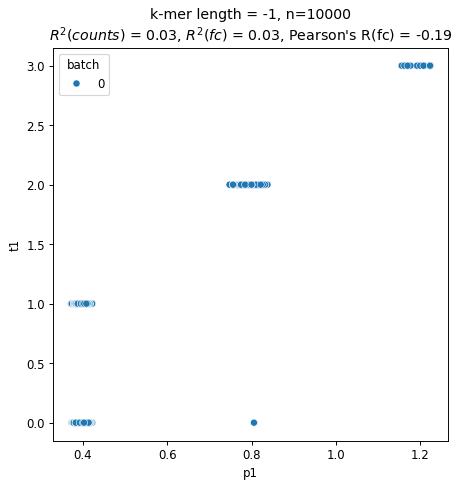

In [35]:
import itertools

models = []

for optimize_exp_barrier, optimize_kernel_rel, optimize_sym_weight in list(itertools.product([False, True], repeat=3)):

    print(optimize_exp_barrier, optimize_kernel_rel, optimize_sym_weight)
    model = mb.models.Mubind.make_model(train, n_kernels, criterion, kernels=kernels,
                                        use_conv1d=use_conv1d,
                                           use_dinuc=use_dinuc, dinuc_mode=dinuc_mode,
                                           optimize_exp_barrier= optimize_exp_barrier,
                                           optimize_kernel_rel = optimize_kernel_rel,
                                           optimize_sym_weight = optimize_sym_weight).cuda()
    # print(model)
    t0 = time.time()

    # assert False
    model, best_loss = model.optimize_iterative(train,
                                                optimiser=torch.optim.LBFGS,
                                                show_logo=0,
                                                r2_per_epoch=True,
                                                opt_kernel_length=opt_kernel_length,
                                                opt_kernel_shift=opt_kernel_shift,
                                                dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                # lr=lr, weight_decay=wd, ignore_kernel=ignore_kernel,
                                                # skip_kernels={2, 3},
                                                n_epochs=n_epochs,
                                                early_stopping=early_stopping, # optimiser=torch.optim.LBFGS,
                                                log_each=log_each,
                                                stop_at_kernel=None) #  seed=seed) # seeds.index[0]) #
    print('##DONE....\n\n')

    total_time = time.time() - t0
    print(f'total time: {total_time}s')
    # print('total time: %.3f s' % ((time.time() - t0)))
    # # res = []
    # # model_by_k = {}
    #
    # counts = mb.tl.predict(model, train)
    # print(counts)
    #
    mb.pl.set_rcParams({'figure.figsize': [10, 6], 'figure.dpi': 65})
    # mb.pl.logo(model)
    #
    # mb.tl.scores(model, train, by='batch')
    mb.pl.set_rcParams({'figure.figsize': [6, 6], 'figure.dpi': 85})
    mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1')
    # mb.pl.activities(model)
    #
    # mb.pl.set_rcParams({'figure.figsize': [8, 4], 'figure.dpi': 85})
    # mb.pl.loss(model)

    models.append([model, best_loss])
    break

    # break


In [ ]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


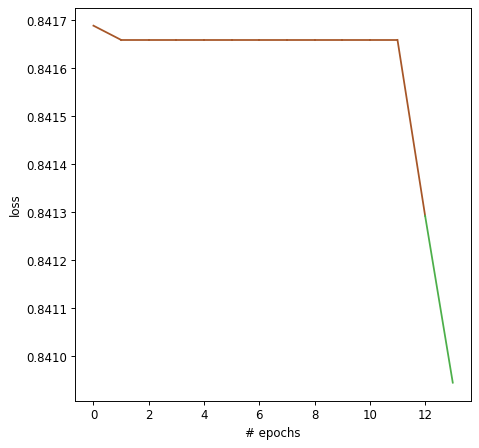

In [ ]:
mb.pl.loss(model)

In [ ]:
# %lprun -f model.graph_module.forward model.optimize_iterative(train, show_logo=0, r2_per_epoch=True, opt_kernel_length=opt_kernel_length, opt_kernel_shift=opt_kernel_shift, dirichlet_regularization=dirichlet_regularization, n_epochs=n_epochs, early_stopping=early_stopping, log_each=log_each, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) #

In [ ]:
for m, best_loss in models:
    print(m.optimize_exp_barrier, m.optimize_kernel_rel, m.optimize_sym_weight, m.r2_final, m.total_time)


False False False 0.040788471698760986 26.84837031364441


True
3
order None
0 out of 3...


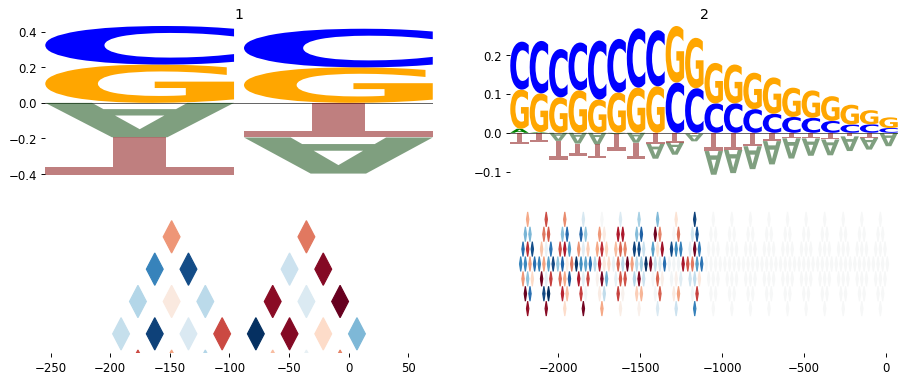

In [ ]:
rcParams['figure.figsize'] = 20, 5
for m, best_loss in models:
    #print(m.optimize_exp_barrier, m.optimize_kernel_rel, m.optimize_sym_weight, m.r2_final, m.total_time)
    mb.pl.logo(m, flip=True)


<Axes: xlabel='index', ylabel='r2'>

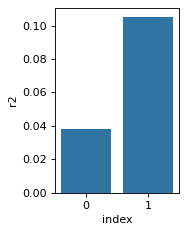

In [ ]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 2, 3
rcParams['figure.dpi'] = 80
import seaborn as sns
r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=['r2']).reset_index()
sns.barplot(data=r2, x='index', y='r2')


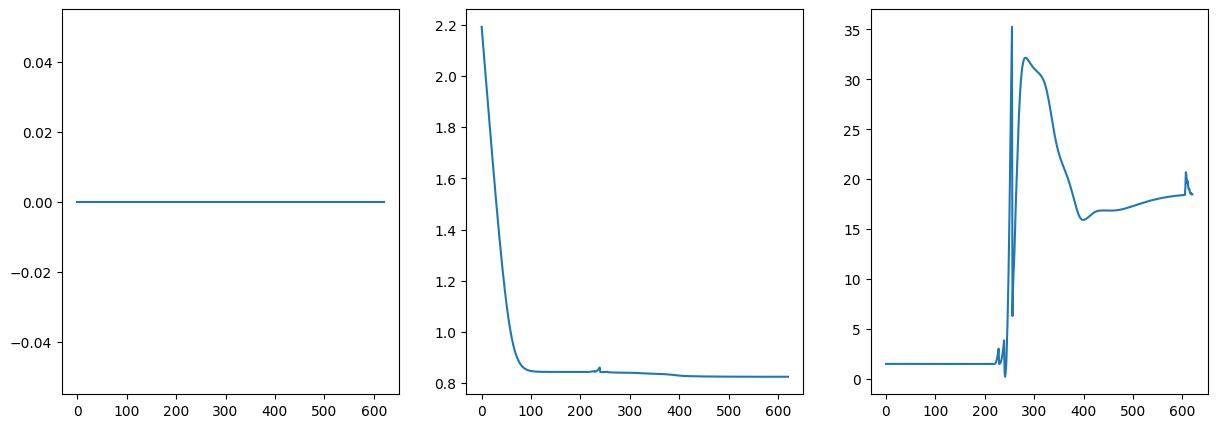

In [ ]:
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 20, 5
rcParams['figure.dpi'] = 100

plt.subplot(1, 4, 1)
plt.plot(model.loss_history_log_dynamic)
plt.subplot(1, 4, 2)
plt.plot(model.loss_history)
plt.subplot(1, 4, 3)
plt.plot(model.loss_history_sym_weights)


In [ ]:
model.get_log_activities()

tensor([[[-1.4364e-08, -2.8094e-02],
         [ 2.3709e-06, -1.1344e+00],
         [ 1.8790e-03, -1.9220e-01]]], device='cuda:0',
       grad_fn=<StackBackward0>)

In [ ]:
model.binding_modes

BindingLayer(
  (conv_mono): ModuleList(
    (0): None
    (1): Conv1d(4, 1, kernel_size=(2,), stride=(1,), bias=False)
    (2): Conv1d(4, 1, kernel_size=(20,), stride=(1,), bias=False)
  )
  (conv_di): ModuleList(
    (0): None
    (1): Conv1d(16, 1, kernel_size=(2,), stride=(1,), bias=False)
    (2): Conv1d(16, 1, kernel_size=(20,), stride=(1,), bias=False)
  )
)

0


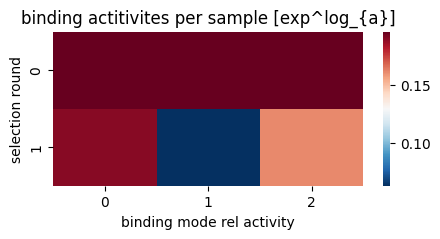

In [ ]:
rcParams['figure.figsize'] = 5, 2
mb.pl.activities(model, cmap='RdBu_r')

In [ ]:
import anndata
adata = anndata.AnnData(data.T)


In [ ]:
import scanpy as sc

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


ValueError: n_components=50 must be between 1 and min(n_samples, n_features)=2 with svd_solver='arpack'

In [ ]:
adata

AnnData object with n_obs × n_vars = 5000 × 2
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

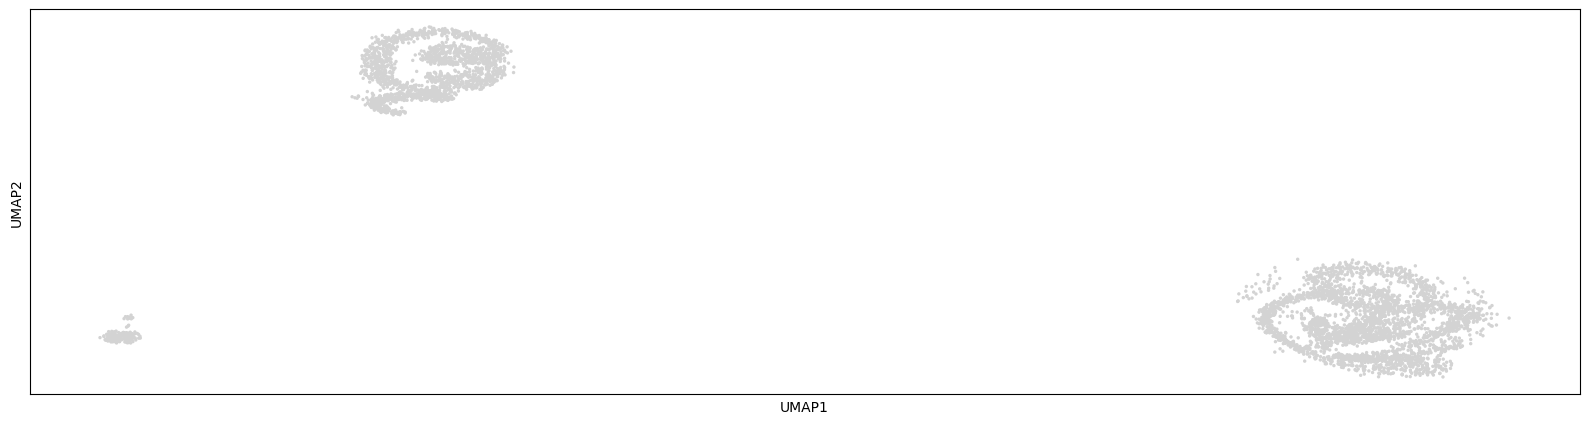

In [ ]:
sc.pl.umap(adata)